In [1]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error as mse

import pandas as pd
RAND_STATE = 41
e = 2.71828 # Euler's number

np.random.seed(RAND_STATE)

# Regression decision trees

Create a set of training and test data points points from a polynomial and add some gaussian noise.

In [2]:
x = np.linspace(-1,1,128)
y = x**3 - x + np.random.normal(0,0.08, len(x))
x_test = np.linspace(-1,1,32)
y_test = x_test**3 - x_test + np.random.normal(0,0.08, len(x_test))

Reshape the feature array into a matrix where each row represents a data point, and columns associated to a given data point represent its features i.e. dataset= [[features_dp_1], [features_dp2], ...]. This is the usual shape used in machine learning framworks such as TensorFlow or sklearn.

In [6]:
x,x_test = x.reshape(-1,1), x_test.reshape(-1,1)

Plot training and test data points.

<function matplotlib.pyplot.show(close=None, block=None)>

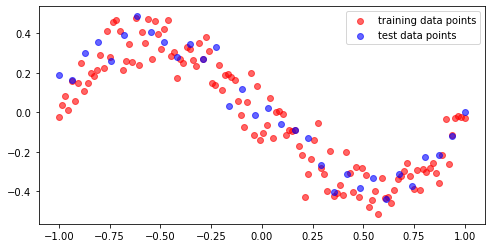

In [7]:
plt.figure(figsize=(8,4))
plt.scatter(x,y,color='red',alpha=0.6, label='training data points')
plt.scatter(x_test,y_test,color='blue', alpha=0.6, label='test data points')
plt.legend()
plt.show

Try to fit a decision tree with max depth = 1

In [8]:
regressor_d1 = DecisionTreeRegressor(max_depth=1)
regressor_d1.fit(x,y)

DecisionTreeRegressor(max_depth=1)

Visualize the built tree. Here we split on x = 0, we get two different regions with two different means.

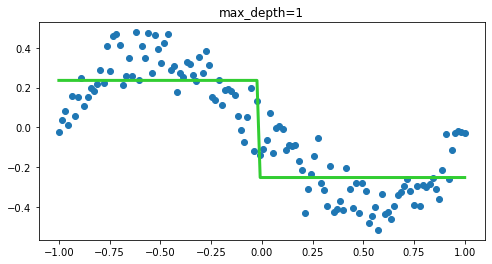

In [9]:
plt.figure(figsize=(8,4))
plt.scatter(x,y)
plt.plot(x, regressor_d1.predict(x), color="limegreen", linewidth=3)
plt.title("max_depth=1")
plt.show()

Try to fit a decision tree with max depth = 2

In [10]:
regressor_d2 = DecisionTreeRegressor(max_depth=2)
regressor_d2.fit(x,y)

DecisionTreeRegressor(max_depth=2)

Plot the decision tree. Here we have three splits and four regions.

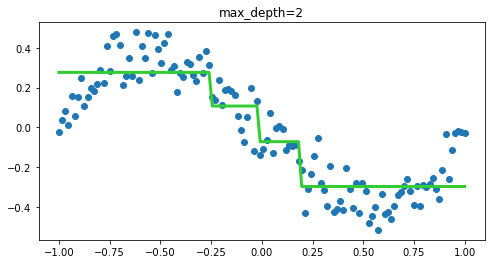

In [11]:
plt.figure(figsize=(8,4))
plt.scatter(x,y)
plt.plot(x, regressor_d2.predict(x), color="limegreen", linewidth=3)
plt.title("max_depth=2")
plt.show()

Plot a tree like visualization.

Notice how we have *four leaves associated with the different regions*. Each leave shows the loss (mse = Mean squared error), the number of samples in that region, and the mean which is returned for all data points in that region. The splits are done on X[0], this means the first feature (which is x cause we only have one)

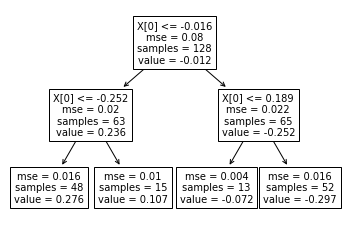

In [12]:
plot_tree(regressor_d2)
plt.show()

Try to fit a decision tree with max depth = 20

In [13]:
regressor_d3 = DecisionTreeRegressor(max_depth=20)
regressor_d3.fit(x,y)

DecisionTreeRegressor(max_depth=20)

Visualize the tree. Notice how this trees is already overfitting (wiggle wiggle to each point)

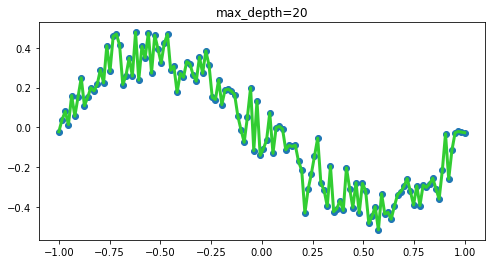

In [14]:
plt.figure(figsize=(8,4))
plt.scatter(x,y)
plt.plot(x, regressor_d3.predict(x.reshape(-1,1)), color="limegreen", linewidth=3)
plt.title("max_depth=20")
plt.show()

Lets see how the error is changing when we change the depth of the trees. Try to vary max_depth from 1 to 19, record the training and test errors.

In [15]:
MAX_DEPTH = 20
history_training = []
history_test = []
for depth in range(1, MAX_DEPTH):
    regressor = DecisionTreeRegressor(max_depth=depth)
    regressor.fit(x,y)
    training_y_hat = regressor.predict(x)
    test_y_hat = regressor.predict(x_test)
    training_regression_error = mse(y, training_y_hat)
    test_regression_error = mse(y_test, test_y_hat)
    history_training.append(training_regression_error)
    history_test.append(test_regression_error)

Plot training and test error. We can see how our tree starts to overfit the training data starting from depth = 3. The training error continues decreasing until 0 while test error starts increasing. 

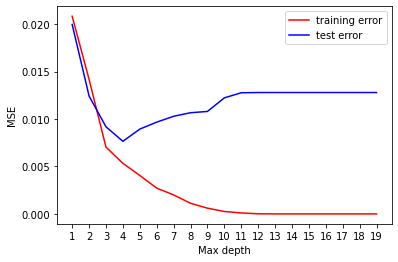

In [16]:
depths = list(range(1, MAX_DEPTH))
plt.plot(depths, history_training, color='red', label='training error')
plt.plot(depths, history_test, color='blue', label='test error')
plt.xticks(depths)
plt.xlabel('Max depth')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Classification decision trees

We will be working on Pima Indians Diabetes Database. The objective is to predict based on diagnostic measurements whether a patient has diabetes. All patients here are females at least 21 years old of Pima Indian heritage.

Features are:
1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1, i.e does not or does have diabetes)

The data is not perfect, some values are out of range (blood pressure = 0 or skin thickness = 0), but we will not wory about that here. Feel free to play with the data.

Import the dataset into a pandas dataframe.

In [17]:
pima = pd.read_csv('./diabetes.csv')

Show few entries.

In [18]:
pima.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Split the data set into training data (80%) and test data (20%).

In [19]:
X_train, X_test, y_train, y_test = train_test_split(pima.iloc[:, :-1], pima.Outcome, test_size=0.2, random_state=RAND_STATE)

Try to vary trees depth, record the cross validation error (10 folds cv), training error and test error. We record the test error just to show how cross validation error can be used to estimate test error (which is not accessible in practice).

In [20]:
MAX_DEPTH = 20
cv_history = []
test_history = []
train_history = []
for depth in range(1, MAX_DEPTH):
    clf = DecisionTreeClassifier(random_state=RAND_STATE, max_depth=depth)
    cv_scores = cross_val_score(clf, X_train, y_train, cv=10)
    cv_history.append(cv_scores.mean())
    clf.fit(X_train, y_train)
    train_history.append(clf.score(X_train, y_train))
    test_history.append(clf.score(X_test, y_test))


Plot test, cross validatio and training errors. See how cross validation errors correlates with test errors. CV gives depth=5 as the best parameter while it's 5 in test data which is not very different. Here also, we notice that our model starts overfitting data when depth increases above 5.

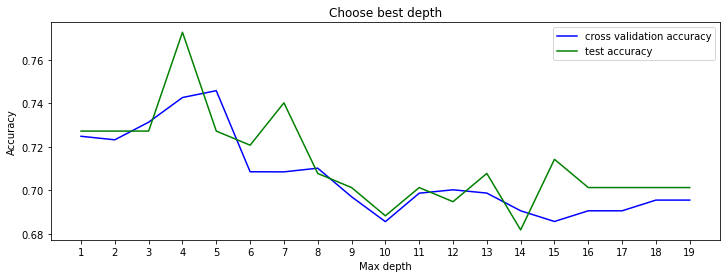

In [21]:
depths = list(range(1, MAX_DEPTH))
plt.figure(figsize=(12,4))
plt.plot(depths, cv_history, label='cross validation accuracy', color='blue')
plt.plot(depths, test_history, label='test accuracy', color='green')
# Uncomment me if you want to see training errors
#plt.plot(depths, train_history, label='training accuracy', color='red')
plt.xticks(depths)
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.title('Choose best depth')
plt.legend()
plt.show()

Fit a decision tree using the best depth = 4

In [22]:
clf = DecisionTreeClassifier(random_state=RAND_STATE, max_depth=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=41)

Using the tree structure we can compute the importance of each one of the features. Intuitively a feature's importance is it's contribution in reducing the impurity of different nodes in the tree.   

Sort features with respect to thier importance (which we get by retrieving the attribute clf.feature_importances_).

In [23]:
sorted_features = sorted(zip(pima.columns[:-1, ], clf.feature_importances_), key= lambda couple: couple[1])

In [24]:
features, scores = zip(*sorted_features)

Apparently Clucose levels, BMI (body mass index) and age are important factors for diabetes.

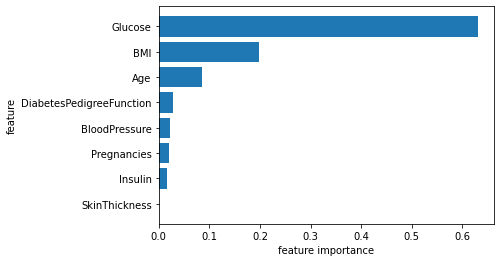

In [25]:
plt.barh(range(len(features)), scores, align='center')
plt.yticks(range(len(features)),features)
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.show()

# Classification random forests

Let's try a random forest on the pima dataset.

We vary the number of trees in the forest and record how test and training errors change with it.

In [26]:
training_history = []
test_history = [] 
NB_TREES = 400
for nb_trees in range(1, NB_TREES, 10):
    clf_rf = RandomForestClassifier(n_estimators=nb_trees) # We don't specifiy trees' max depth i.e all trees are
    #build until all nodes are pure
    clf_rf.fit(X_train,y_train)
    training_history.append(clf_rf.score(X_train,y_train))
    test_history.append(clf_rf.score(X_test, y_test))

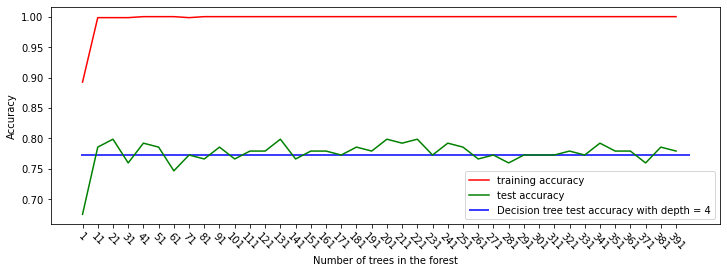

In [27]:
nb_trees = list(range(1, NB_TREES, 10))
plt.figure(figsize=(12,4))
plt.plot(nb_trees, training_history, label='training accuracy', color='red')
plt.plot(nb_trees, test_history, label='test accuracy', color='green')
plt.hlines(y=clf.score(X_test, y_test), xmin=0, xmax=400, color='blue', label='Decision tree test accuracy with depth = 4')
plt.xticks(nb_trees, rotation=-45)
plt.xlabel('Number of trees in the forest')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Bonus

We have seen in the lecture that boostrapping is used to buold different data set on top of which we build our trees.

We've seen that when we boostrap n points only *~2/3* of them get selected to be part of the boostrapped dataset i.e a given datapoint has probability ~1/3 of not being chosen. Let's test it.

Let's suppose we have 100 individuals identified by ID from 0 to 99

In [28]:
data_points = np.arange(0, 100)

In [29]:
print(data_points)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


Bootstrapping is equavalent of a random drawing 100 individuals with replacement. One can use np.random.choice() for that.

Can you spot indivuduals drawn more than once?

In [30]:
print(np.random.choice(data_points, len(data_points), replace=True))

[47 10 14 78  8 99 38 47  8 67 92 22 69 57 83 46  3 76 18 44 30 68 86 54
 40 93 27 92 66 66  3 33 56 31 61 93  2 23 41 21  1 65 52 59  0 81 49 80
 83 67 11 60 40 35 59 55 44 65 93 73 68 63 75 32 21 70 58 12  8 38 89 30
 25 96 87 17  2  3 25 54  0  3 69 65 62 32 37 62 64 47 87 96 28 96 77 86
 35 50 66 63]


Let's repeat our experiment for 2000 times to discover the probability of some individual (we will check if individual `0` is chosen or not) not being chosen to be part of a boostrapped dataset.

In [31]:
cpt = 0
history = []
for step in range(1, 2000 + 1):
    boostrapped_dataset = np.random.choice(data_points, len(data_points), replace=True)
    if np.all(boostrapped_dataset): # if 0 is not chosen, we increment a counter
        cpt += 1
    history.append(cpt / step)

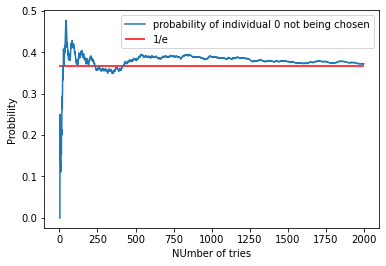

In [32]:
plt.plot(range(1, 2000 + 1), history, label='probability of individual 0 not being chosen')
plt.hlines(y=1/e, xmin=0, xmax=2000, color='red', label = '1/e')
plt.ylabel('Probbility')
plt.xlabel('NUmber of tries')
plt.legend()
plt.show()

## Exercise:

Prove analytically that an individual has a probability of `1 - 1/e` of being chosen as part of a boostrapped dataset when the size `n` is large enough 